<a href="https://colab.research.google.com/github/iceman025/house-price/blob/main/P02_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [447]:
# load library
library('ggplot2')
library('dplyr') 
install.packages('randomForest')
library('randomForest') 
library("tidyverse")
library(rpart) 
library(randomForest) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [448]:
# load data 
house_train <- read.csv('https://raw.githubusercontent.com/iceman025/house-price/main/train.csv')
house_test <-('https://raw.githubusercontent.com/iceman025/house-price/main/test.csv')
dim(house_train)
str(house_train)

[1] 1460   81

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [449]:
#Count the number of columns that consists of text data
sum(sapply(house_train[,1:81], typeof) == "character")
#Count the number of columns that consists of numerical data
sum(sapply(house_train[,1:81], typeof) == "integer")

[1] 43

[1] 38

In [450]:
# Check missing values . Identify the columns which have missing values 
mvc = 0
for (i in 1:ncol(house_train))
{
  m = sum(is.na(house_train[,i]))
  print(paste("Column ",colnames(house_train[i])," has ",m," missing values"))
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
    }
}  
print(paste("Dataset has overall ",mvc," columns with missing values"))

[1] "Column  Id  has  0  missing values"
[1] "Column  MSSubClass  has  0  missing values"
[1] "Column  MSZoning  has  0  missing values"
[1] "Column  LotFrontage  has  259  missing values"
[1] "Column  LotArea  has  0  missing values"
[1] "Column  Street  has  0  missing values"
[1] "Column  Alley  has  1369  missing values"
[1] "Column  LotShape  has  0  missing values"
[1] "Column  LandContour  has  0  missing values"
[1] "Column  Utilities  has  0  missing values"
[1] "Column  LotConfig  has  0  missing values"
[1] "Column  LandSlope  has  0  missing values"
[1] "Column  Neighborhood  has  0  missing values"
[1] "Column  Condition1  has  0  missing values"
[1] "Column  Condition2  has  0  missing values"
[1] "Column  BldgType  has  0  missing values"
[1] "Column  HouseStyle  has  0  missing values"
[1] "Column  OverallQual  has  0  missing values"
[1] "Column  OverallCond  has  0  missing values"
[1] "Column  YearBuilt  has  0  missing values"
[1] "Column  YearRemodAdd  has  0  miss

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 10624

[1] 13137.37

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


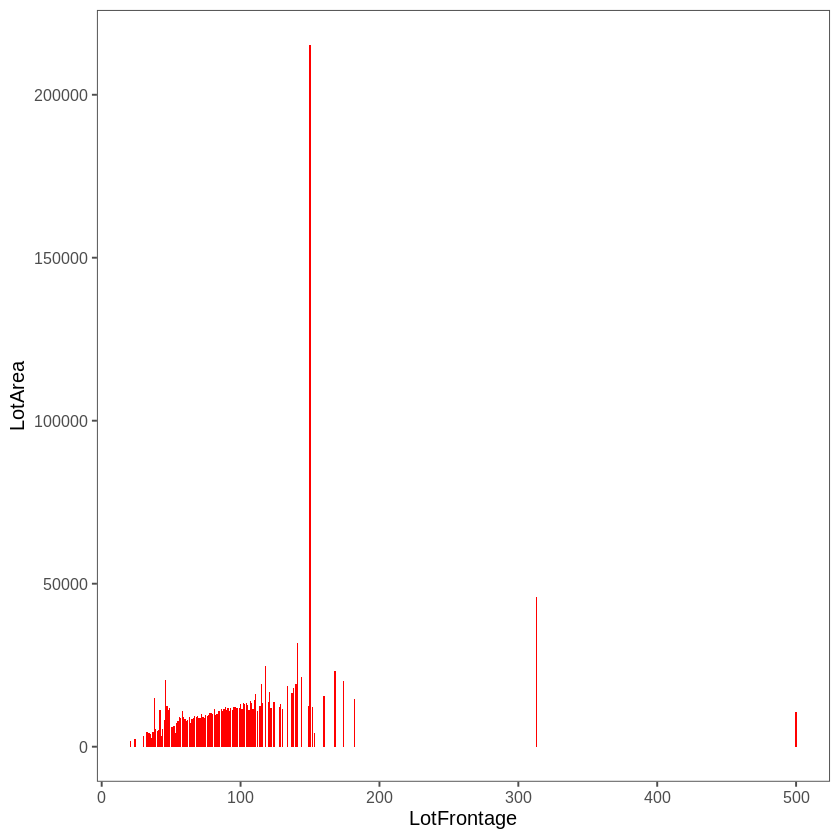

 Factor w/ 3 levels "Grvl","No alley access",..: 2 2 2 2 2 2 2 2 2 2 ...
[1] "Column  Id  has  0  missing values"
[1] "Column  MSSubClass  has  0  missing values"
[1] "Column  MSZoning  has  0  missing values"
[1] "Column  LotFrontage  has  0  missing values"
[1] "Column  LotArea  has  0  missing values"
[1] "Column  Street  has  0  missing values"
[1] "Column  Alley  has  0  missing values"
[1] "Column  LotShape  has  0  missing values"
[1] "Column  LandContour  has  0  missing values"
[1] "Column  Utilities  has  0  missing values"
[1] "Column  LotConfig  has  0  missing values"
[1] "Column  LandSlope  has  0  missing values"
[1] "Column  Neighborhood  has  0  missing values"
[1] "Column  Condition1  has  0  missing values"
[1] "Column  Condition2  has  0  missing values"
[1] "Column  BldgType  has  0  missing values"
[1] "Column  HouseStyle  has  0  missing values"
[1] "Column  OverallQual  has  0  missing values"
[1] "Column  OverallCond  has  0  missing values"
[1] "Column  YearBu

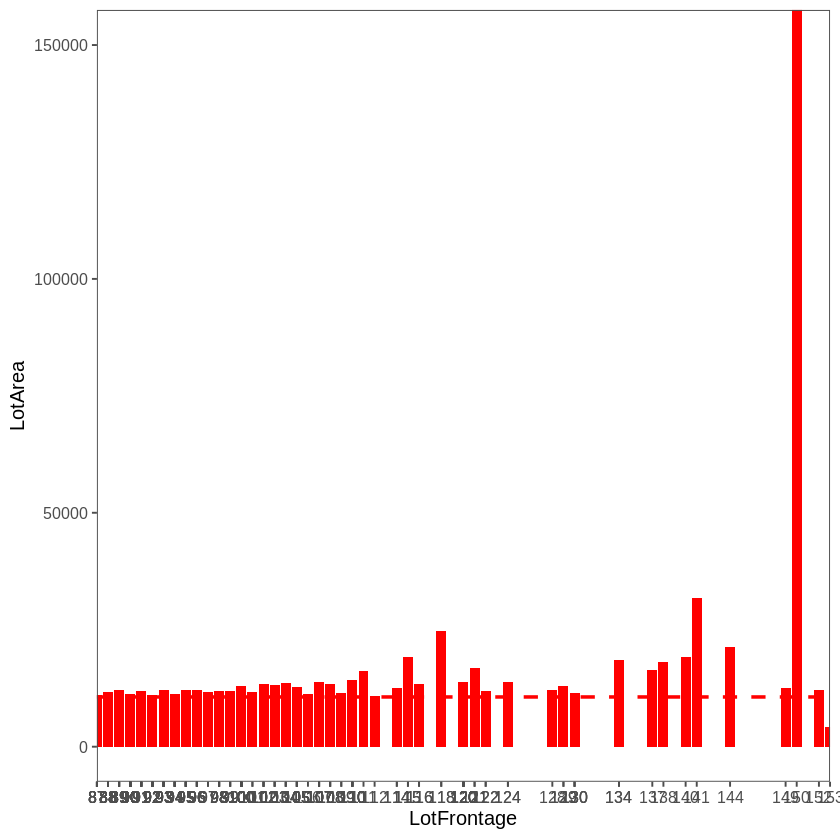

In [451]:
# Check LotFrontage and LotArea
# Assign LotFrontage values 500 to the missing value
# the missing values with price
house_train$LotFrontage[is.na(house_train$LotFrontage)] <- 500
# median of LotArea for each LotFrontage
ggplot(house_train, aes(x = LotFrontage, y = LotArea)) +
  stat_summary(fun.y = "median", geom  = "bar", fill="red")+
  labs(x = 'LotFrontage') +
  theme_few()
# Checking mean and median of LotArea for missing 
median(subset(house_train, house_train$LotFrontage == 500)$LotArea)
mean(subset(house_train, house_train$LotFrontage == 500)$LotArea)
# Plotting the median
plot1 <- ggplot(house_train, aes(x = LotFrontage, y = LotArea)) +
  stat_summary(fun.y = "median", geom  = "bar", fill="red")+geom_hline(aes(yintercept=10624), 
                                                                       colour='red', linetype='dashed', lwd=1)+
  labs(x = 'LotFrontage') +
  scale_x_continuous(breaks=house_train$LotFrontage) +
  theme_few()
# plot with "zoomed region"
plot1 + coord_cartesian(xlim = c(90,150),ylim= c(0,150000))
# Assign missing values of LotFrontage to 96 
house_train$LotFrontage[house_train$LotFrontage == 500] <- 96

# Alley access with NA means no alley access. replace it with empty or blank value
house_train$Alley <- as.character(house_train$Alley)
house_train$Alley[is.na(house_train$Alley)] <- 'No alley access'
house_train$Alley <- factor(house_train$Alley)
str(house_train$Alley)

# Missing value for MasVnrType, MasVnrArea and Electrical
# Since only 9 rows altoghether are missing ,omit them from the dataset
house_train <- house_train[!is.na(house_train$MasVnrType),]
house_train <- house_train[!is.na(house_train$Electrical),]

# Missing value for houses without basement 
house_train$BsmtQual <- as.character(house_train$BsmtQual)
house_train$BsmtQual[is.na(house_train$BsmtQual)] <- 'No Basement'
house_train$BsmtQual <- factor(house_train$BsmtQual)

house_train$BsmtCond <- as.character(house_train$BsmtCond)
house_train$BsmtCond[is.na(house_train$BsmtCond)] <- 'No Basement'
house_train$BsmtCond <- factor(house_train$BsmtCond)
house_train$BsmtExposure <- as.character(house_train$BsmtExposure)
house_train$BsmtExposure[is.na(house_train$BsmtExposure)] <- 'No Basement'
house_train$BsmtExposure <- factor(house_train$BsmtExposure)

house_train$BsmtFinType1 <- as.character(house_train$BsmtFinType1)
house_train$BsmtFinType1[is.na(house_train$BsmtFinType1)] <- 'No Basement'
house_train$BsmtFinType1 <- factor(house_train$BsmtFinType1)
house_train$BsmtFinType2 <- as.character(house_train$BsmtFinType2)
house_train$BsmtFinType2[is.na(house_train$BsmtFinType2)] <- 'No Basement'
house_train$BsmtFinType2 <- factor(house_train$BsmtFinType2)

# Missing value for fire  place
house_train$FireplaceQu <- as.character(house_train$FireplaceQu)
house_train$FireplaceQu[is.na(house_train$FireplaceQu)] <- 'No Fireplace'
house_train$FireplaceQu <- factor(house_train$FireplaceQu)

# Missing value for garage  
house_train$GarageType <- as.character(house_train$GarageType)
house_train$GarageType[is.na(house_train$GarageType)] <- 'No Garage'
house_train$GarageType <- factor(house_train$GarageType)
house_train$GarageYrBlt[is.na(house_train$GarageYrBlt)] <- 0
house_train$GarageFinish <- as.character(house_train$GarageFinish)
house_train$GarageFinish[is.na(house_train$GarageFinish)] <- 'No Garage'
house_train$GarageFinish <- factor(house_train$GarageFinish)
house_train$GarageQual <- as.character(house_train$GarageQual)
house_train$GarageQual[is.na(house_train$GarageQual)] <- 'No Garage'
house_train$GarageQual <- factor(house_train$GarageQual)
house_train$GarageCond <- as.character(house_train$GarageCond)
house_train$GarageCond[is.na(house_train$GarageCond)] <- 'No Garage'
house_train$GarageCond <- factor(house_train$GarageCond)
# Missing value for pool  
house_train$PoolQC <- as.character(house_train$PoolQC)
house_train$PoolQC[is.na(house_train$PoolQC)] <- 'No Pool'
house_train$PoolQC <- factor(house_train$PoolQC)
# Missing value for fence
house_train$Fence <- as.character(house_train$Fence)
house_train$Fence[is.na(house_train$Fence)] <- 'No Fence'
house_train$Fence <- factor(house_train$Fence)

# Missing value for other miscellaneous feature
house_train$MiscFeature <- as.character(house_train$MiscFeature)
house_train$MiscFeature[is.na(house_train$MiscFeature)] <- 'None'
house_train$MiscFeature <- factor(house_train$MiscFeature)

# Check if any missing values are there
mvc = 0
for (i in 1:ncol(house_train))
{
  m = sum(is.na(house_train[,i]))
  print(paste("Column ",colnames(house_train[i])," has ",m," missing values"))
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
  }
}  
print(paste("Dataset has overall ",mvc," columns with missing values"))


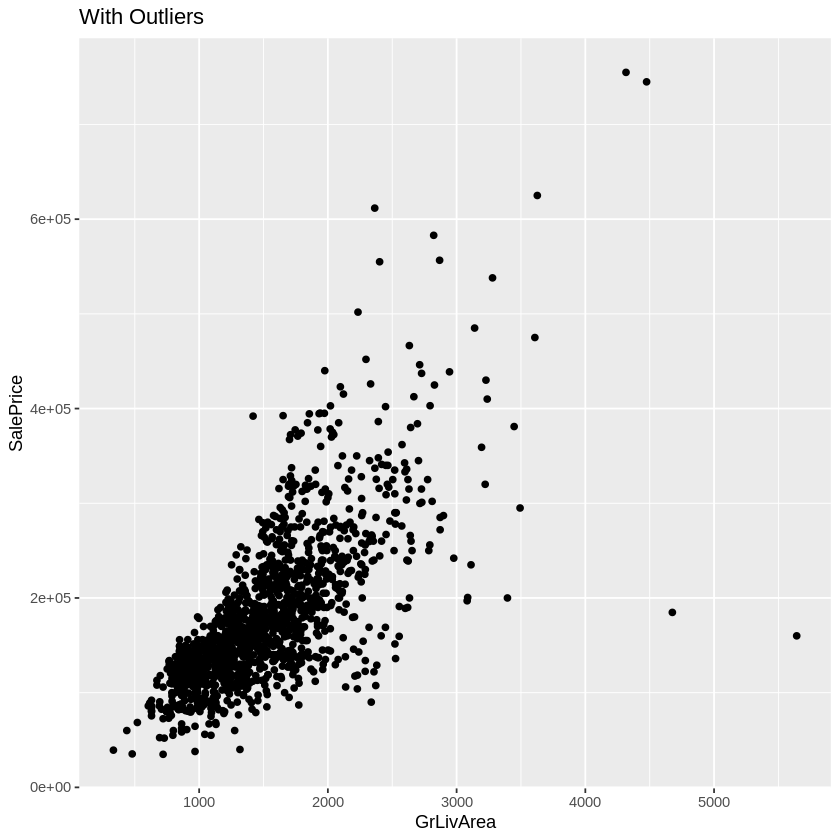

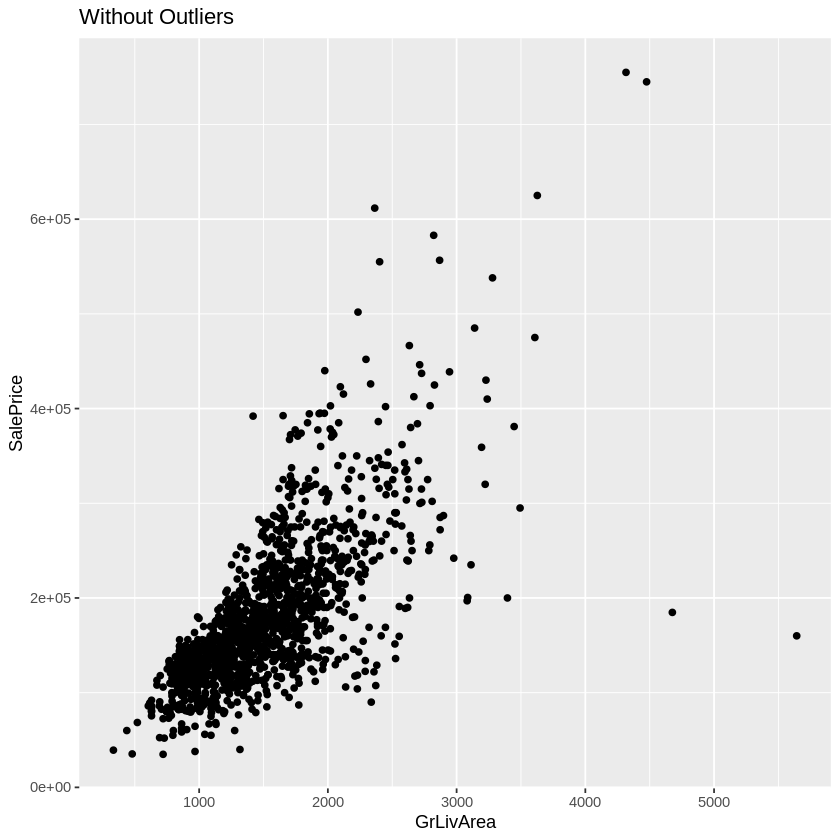

In [452]:
# data visulaziation 
ggplot(house_train,aes(y=SalePrice,x=GrLivArea))+ggtitle("With Outliers")+geom_point()
train[house_train$GrLivArea>4000&house_train$SalePrice<2e+05,]$GrLivArea <- mean(house_train$GrLivArea)%>%as.numeric
ggplot(house_train,aes(y=SalePrice,x=GrLivArea))+ggtitle("Without Outliers")+geom_point()

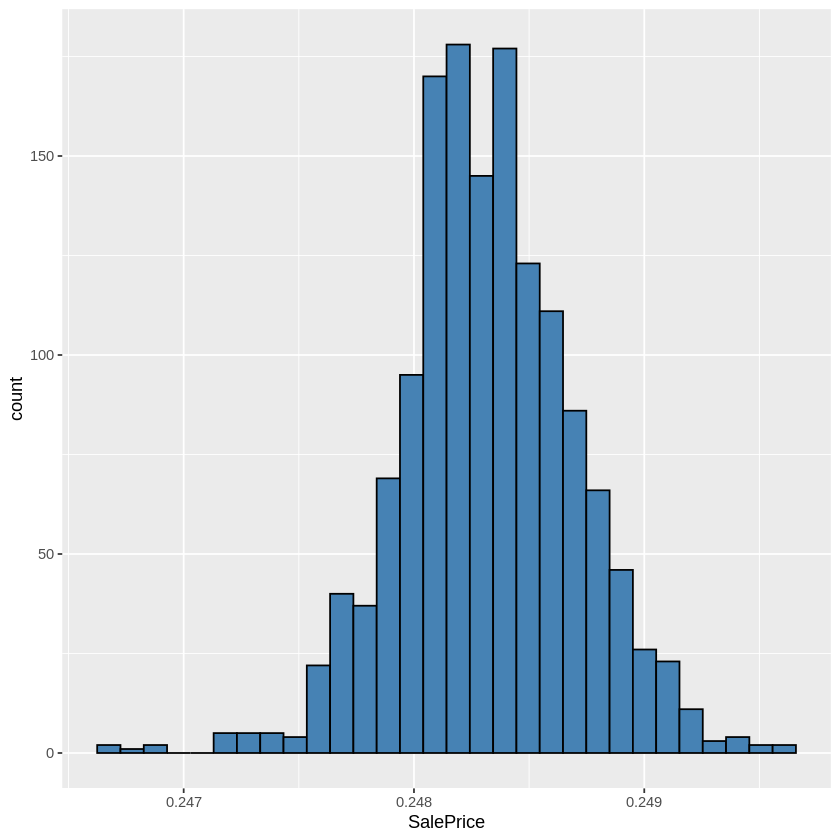

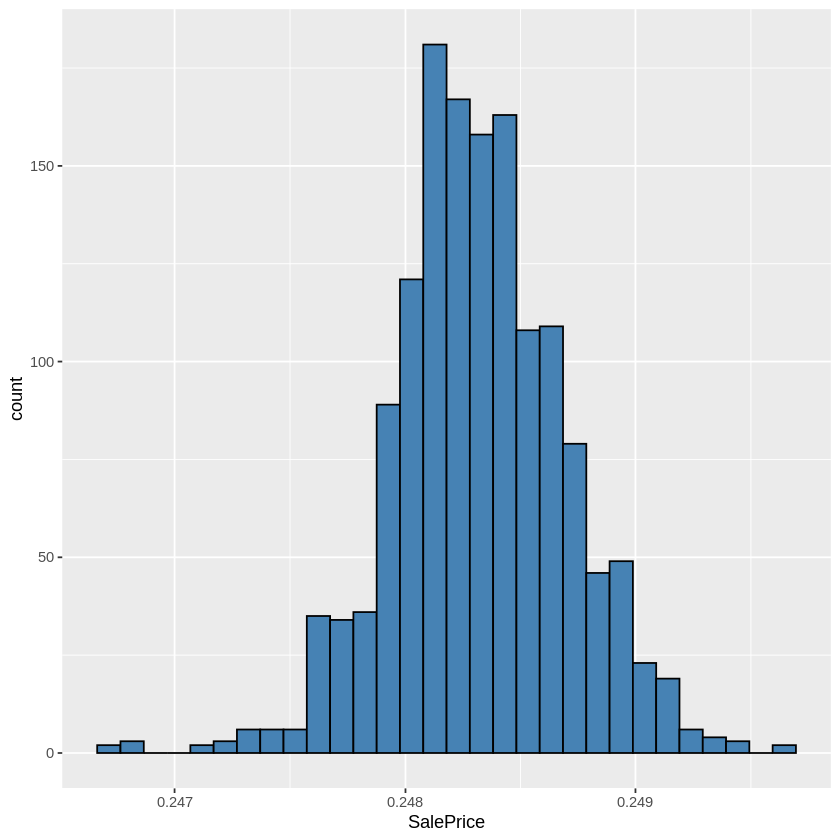

In [453]:
# data visualization
ggplot(train,aes(SalePrice))+geom_histogram(fill="steelblue",color="black",bins = 30)
ggplot(train,aes(SalePrice))+geom_histogram(fill="steelblue",color="black",bins = 30)+scale_x_log10()
train$SalePrice <- log(train$SalePrice+1)
test$SalePrice <- as.numeric(0)

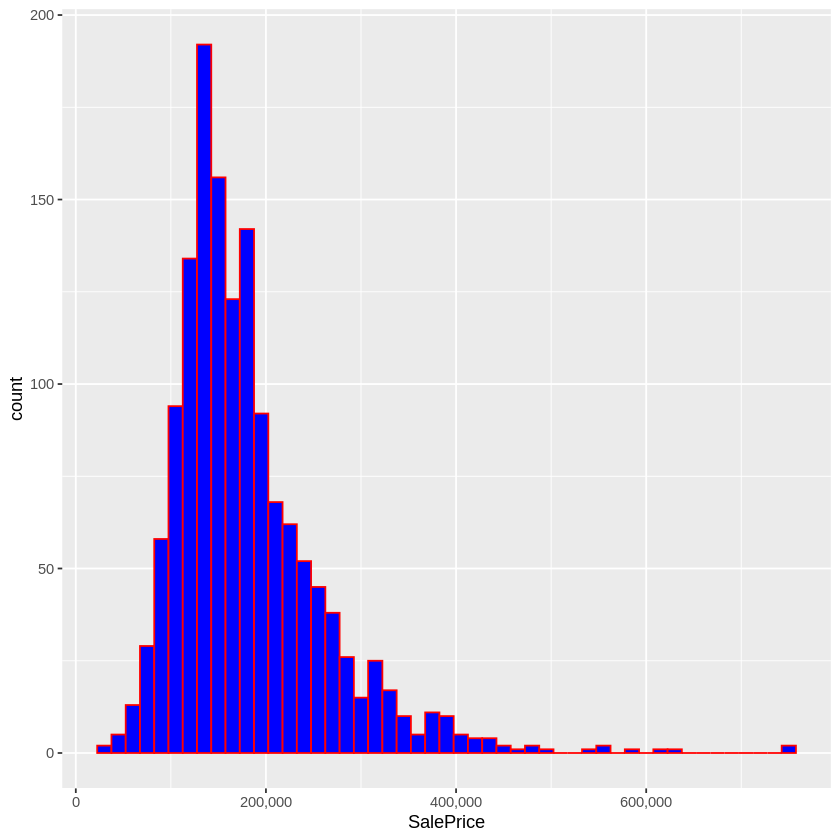

In [454]:
# sales price distribution- looks like normal distribution
require(scales)
ggplot(house_train, aes(x=SalePrice)) + geom_histogram(binwidth = 15000 ,color="red",fill="blue")+ scale_x_continuous(labels = comma)


`geom_smooth()` using formula 'y ~ x'



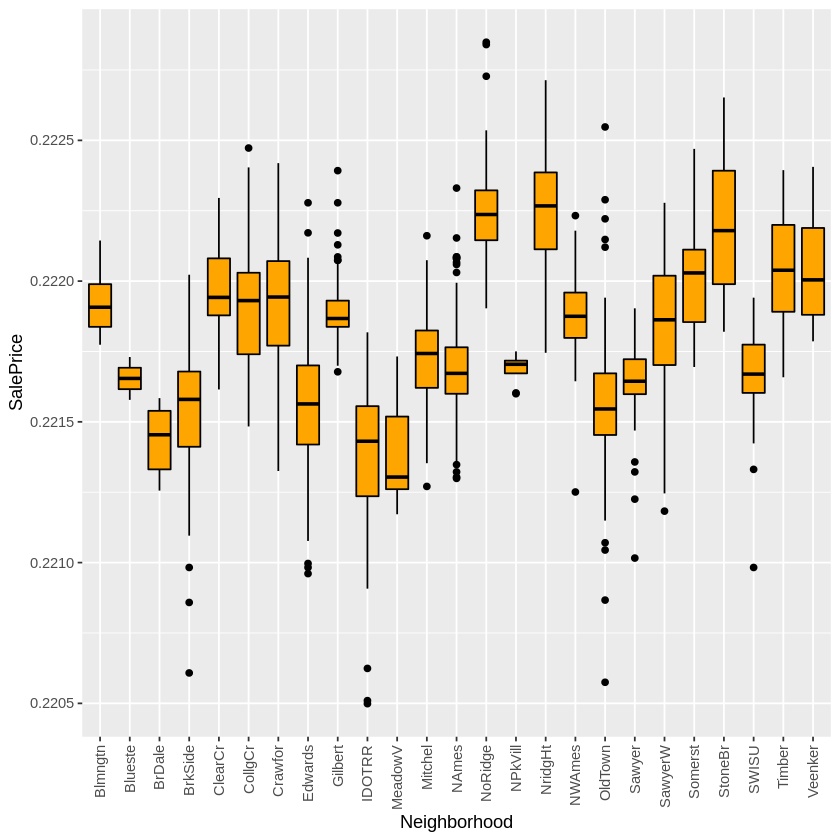

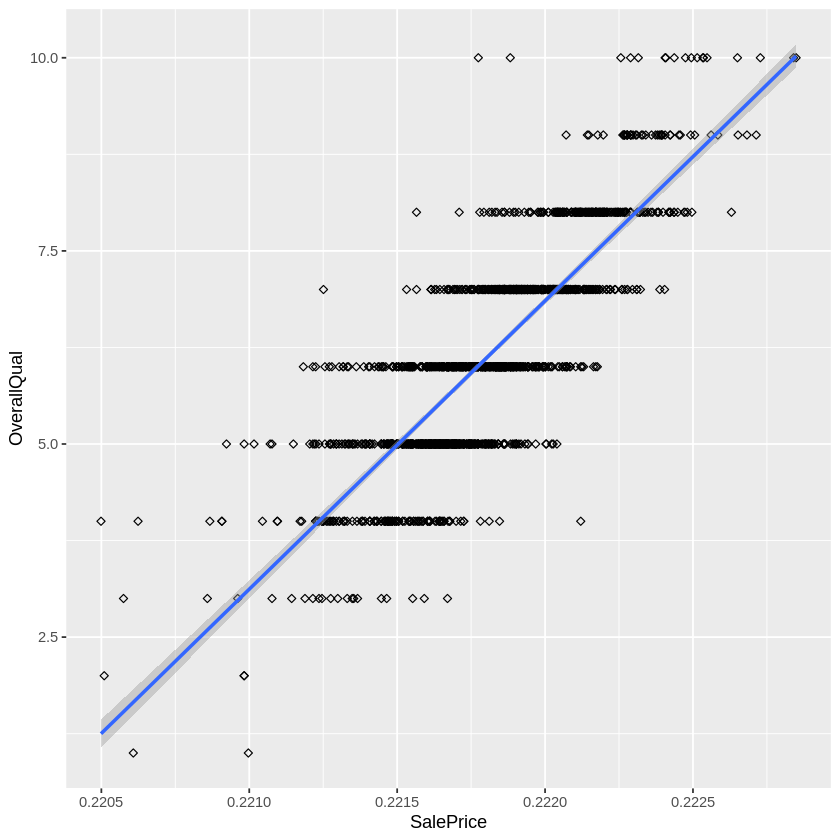

In [455]:
# Feature engineering: some features are useful, other are not 
ggplot(train, aes(x=Neighborhood,y=SalePrice)) + geom_boxplot(color="black", fill="orange")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
scale_y_continuous(labels = comma)

ggplot(train, aes(x=SalePrice,y=OverallQual)) + geom_point(shape=23) + geom_smooth(method="lm")

In [456]:
# build randomforest model
rf_model <- randomForest(SalePrice ~ .,  data = house_train,importance = T)
summary(rf_model)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1451   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1451   -none- numeric  
importance       160   -none- numeric  
importanceSD      80   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1451   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [457]:
# prediction of randomforest model
prediction <- predict(rf_model, data = test)
head(prediction)

1        2        3        4        5        6 
206188.3 172048.7 214501.7 181745.4 291982.3 153492.9

In [458]:
# calculate RMSE
RMSE <- function(x,y){
  a <- sqrt(sum((log(x)-log(y))^2)/length(y))
  return(a)
}

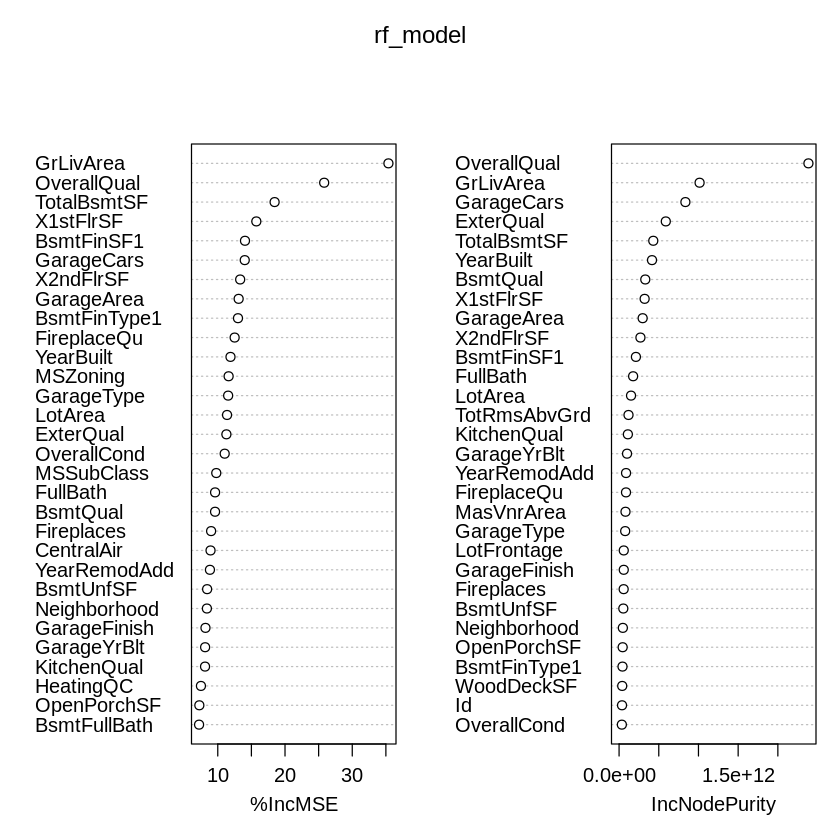

In [459]:
# importance ranking of variables 
importance    <- importance(rf_model)
varImpPlot(rf_model)

In [460]:
# build Linear Regression Model
lm_model <- lm(SalePrice ~ ., data=house_train)
summary(lm_model)


Call:
lm(formula = SalePrice ~ ., data = house_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-176760   -9349     154    9443  176760 

Coefficients: (8 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -6.456e+05  1.058e+06  -0.610 0.541870    
Id                       9.392e-01  1.550e+00   0.606 0.544666    
MSSubClass              -6.018e+01  8.273e+01  -0.727 0.467142    
MSZoningFV               3.469e+04  1.202e+04   2.886 0.003975 ** 
MSZoningRH               2.307e+04  1.190e+04   1.939 0.052729 .  
MSZoningRL               2.627e+04  1.023e+04   2.567 0.010370 *  
MSZoningRM               2.245e+04  9.585e+03   2.342 0.019320 *  
LotFrontage              3.825e+01  3.861e+01   0.991 0.321996    
LotArea                  7.261e-01  1.092e-01   6.648 4.52e-11 ***
StreetPave               3.313e+04  1.217e+04   2.722 0.006591 ** 
AlleyNo alley access    -1.809e+03  4.213e+03  -0.429 0.66

In [461]:
# prediction of linear model
prediction_2 <- predict(model, data = test)
prediction_2

1         2         3         4         5         6         7         8 
205979.95 170589.15 213184.62 179507.36 294424.19 154850.30 289434.43 219528.99 
        9        10        11        12        13        14        15        16 
160197.82 130032.53 131816.70 384503.82 131399.34 225399.95 152596.14 132239.76 
       17        18        19        20        21        22        23        24 
148618.48 112901.47 150472.73 132668.57 325808.49 135228.70 238369.32 141168.98 
       25        26        27        28        29        30        31        32 
142461.67 258110.24 127220.93 300188.41 174530.43  78297.47 101245.42 139575.69 
       33        34        35        36        37        38        39        40 
211619.36 167151.04 284623.52 310950.66 150064.78 157142.72 135177.20  92789.03 
       41        42        43        44        45        46        47        48 
154986.00 159654.77 138631.77 125869.38 138365.91 277398.56 272305.78 243652.99 
       49        50        51        52        53        54        55        56 
114585.74 128033.05 176218.25 125368.55 115821.75 351540.27 132750.43 165735.11 
       57        58        59        60        61        62        63        64 
207770.82 204235.05 378038.52 123387.18 161396.44  98632.25 210285.82 152958.01 
       65        66        67        68        69        70        71        72 
233500.98 308891.89 257122.22 211081.70  99231.66 240128.19 251825.40 124628.66 
       73        74        75        76        77        78        79        80 
190773.43 142184.98 123232.47  97449.04 113448.47 116431.95 127531.35 115169.71 
       81        82        83        84        85        86        87        88 
196368.15 173502.52 239321.45 131629.60 173903.82 278521.37 181360.14 163412.90 
       89        90        91        92        93        94        95        96 
118400.94 120939.21  99238.92 142362.39 126108.97 188394.02 210049.51 173080.91 
       97        98        99       100       101       102       103       104 
226700.38 128831.78  97413.96 121006.09 194088.17 182794.95 126465.55 205635.92 
      105       106       107       108       109       110       111       112 
166566.67 265888.81  98163.21 105662.94 122351.44 204945.23 146107.71 172169.58 
      113       114       115       116       117       118       119       120 
308206.30 213798.65 190683.73 168370.40 139672.00 146079.77 300490.12 174805.38 
      121       122       123       124       125       126       127       128 
155463.95 103428.65 140524.87 176143.69 171472.21  94731.30 140846.20 101101.64 
      129       130       131       132       133       134       135       136 
147126.03 144086.08 211620.76 214235.00 142837.41 224886.26 168741.98 176301.61 
      137       138       139       140       141       142       143       144 
153230.71 223266.41 258741.59 200575.72 105761.30 251247.17 133050.62 212189.51 
      145       146       147       148       149       150       151       152 
155498.45 151549.97 107672.01 226949.74 144846.94 113651.27 137259.60 323468.78 
      153       154       155       156       157       158       159       160 
191158.57 167946.50 123331.63  90107.88 108422.99 290004.02 234541.98 276030.63 
      161       162       163       164       165       166       167       168 
163709.89 372250.46 232593.13  97246.37 140319.84 114428.63 186752.53 335709.91 
      169       170       171       172       173       174       175       176 
198232.49 251079.32 133009.86 183859.03 196275.66 153740.03 200243.19 212910.07 
      177       178       179       180       181       182       183       184 
226678.75 180337.12 409856.48 110801.36 170914.00 166799.69 131543.35 212044.55 
      185       186       187       188       189       190       191       192 
124249.54 371828.10 177282.44 130099.55 143734.76 268280.48 276660.38 169924.60 
      193       194       195       196       197       198       199       200 
199252.59 142255.46 122631.28 151058.48

[1] "Plot of variable importance"
[1] "Variable importance of initial model"


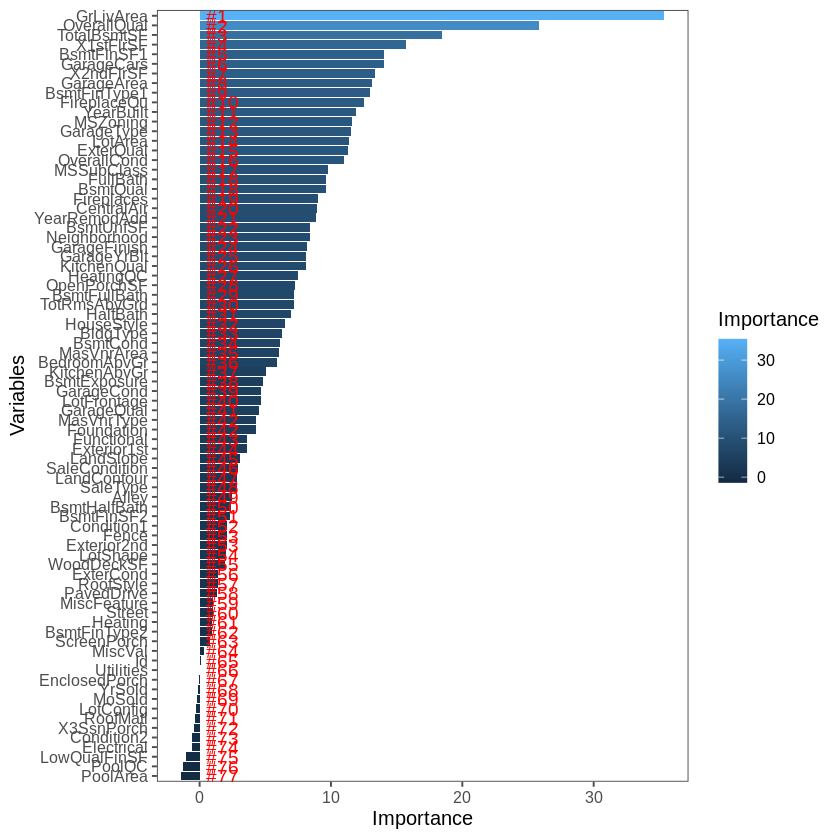

In [462]:
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'%IncMSE'],2))

#  rank variable based on importance
rankImportance <- varImportance %>% mutate(Rank = paste0('#',dense_rank(desc(Importance))))

#  visualize the relative importance of variables
print("Plot of variable importance")
print("Variable importance of initial model")
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
                           y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
            hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


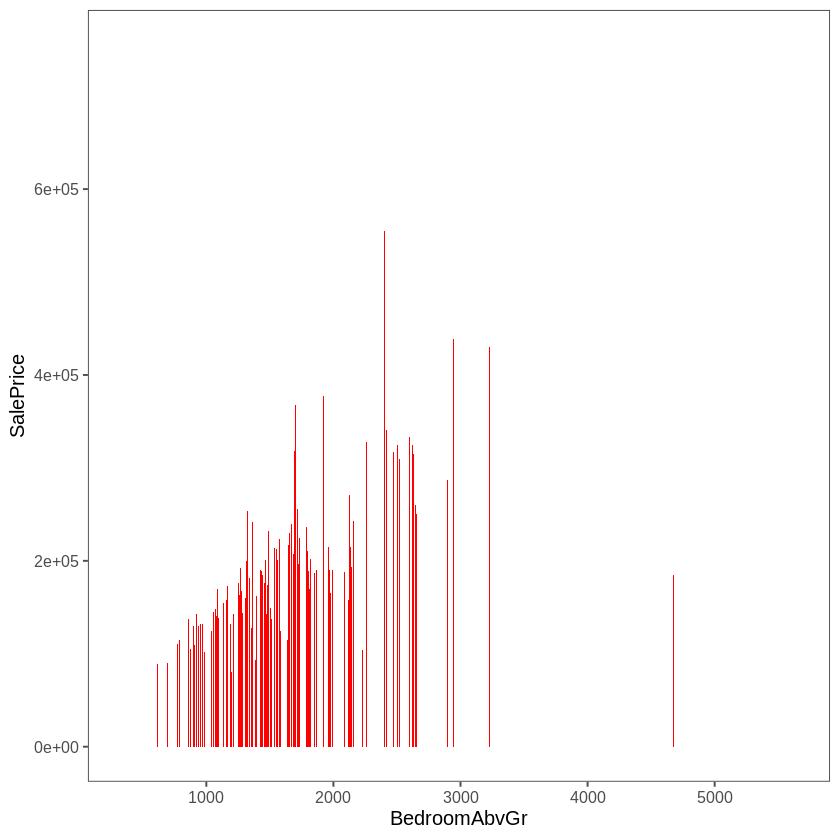

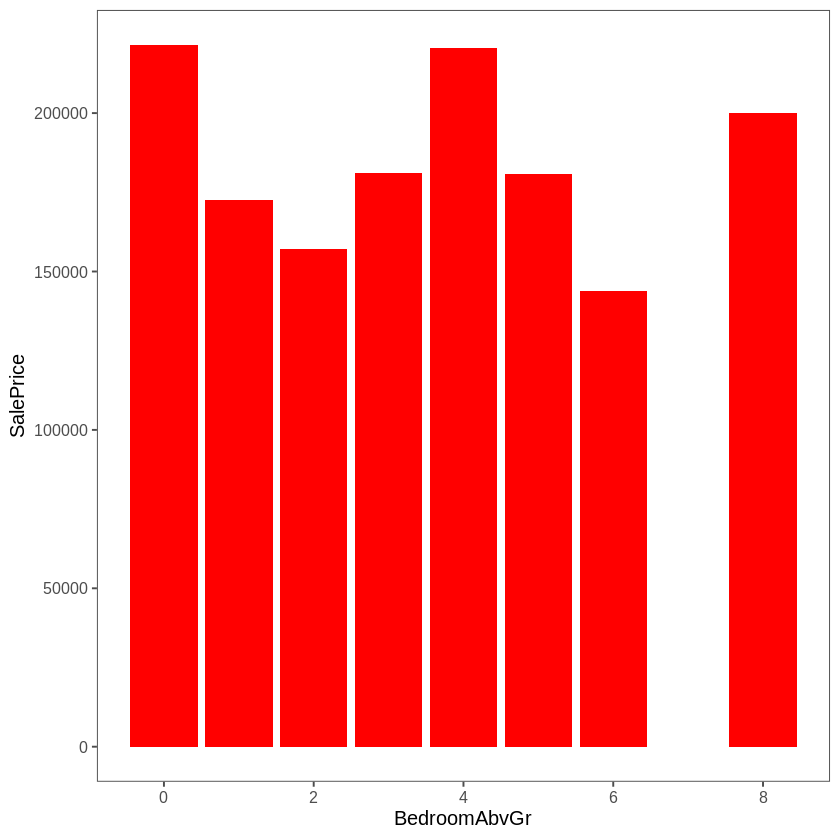

In [463]:
# From importance rank, Gr living area is the most important variable
# plot its relation with sale price
ggplot(house_train, aes(x = GrLivArea, y = SalePrice)) +
  geom_bar(stat='identity', position='dodge', fill='red') +
  labs(x = 'BedroomAbvGr') +
  theme_few()

ggplot(house_train, aes(x = BedroomAbvGr, y = SalePrice)) +
  stat_summary(fun.y = "mean", geom  = "bar", fill="red") +
  labs(x = 'BedroomAbvGr') +
  theme_few()

In [464]:
# model improvement; random forest
rf_model2 <- randomForest(SalePrice ~ GrLivArea + GarageArea + GarageCars + X2ndFlrSF + LotArea + FullBath + YearBuilt + ExterQual + FireplaceQu
                              + KitchenQual + GarageFinish + BsmtQual + GarageType  + OpenPorchSF + YearRemodAdd
                              + MSZoning + Exterior1st + HouseStyle + Fireplaces + BsmtUnfSF + WoodDeckSF + GarageYrBlt + GarageQual
                              + CentralAir ,
                              data = house_train,  importance = T)
print(rf_model2)
importance(rf_model2)
# prediction of randomforest model
prediction2 <- predict(rf_model2, data = house_test)
head(prediction2)


Call:
 randomForest(formula = SalePrice ~ GrLivArea + GarageArea + GarageCars +      X2ndFlrSF + LotArea + FullBath + YearBuilt + ExterQual +      FireplaceQu + KitchenQual + GarageFinish + BsmtQual + GarageType +      OpenPorchSF + YearRemodAdd + MSZoning + Exterior1st + HouseStyle +      Fireplaces + BsmtUnfSF + WoodDeckSF + GarageYrBlt + GarageQual +      CentralAir, data = house_train, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 973978170
                    % Var explained: 84.51


,%IncMSE,IncNodePurity
GrLivArea,43.572166,1.788378e+12
GarageArea,19.998651,7.019753e+11
GarageCars,19.465317,1.303587e+12
X2ndFlrSF,17.143979,3.288879e+11
LotArea,17.881531,3.597885e+11
FullBath,11.369745,2.420118e+11
YearBuilt,16.098099,6.228374e+11
ExterQual,18.750561,1.063835e+12
FireplaceQu,17.596109,2.148767e+11
KitchenQual,11.655793,3.464741e+11


1        2        3        4        5        6 
210704.6 161076.5 228333.7 182940.0 287760.3 165921.8

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



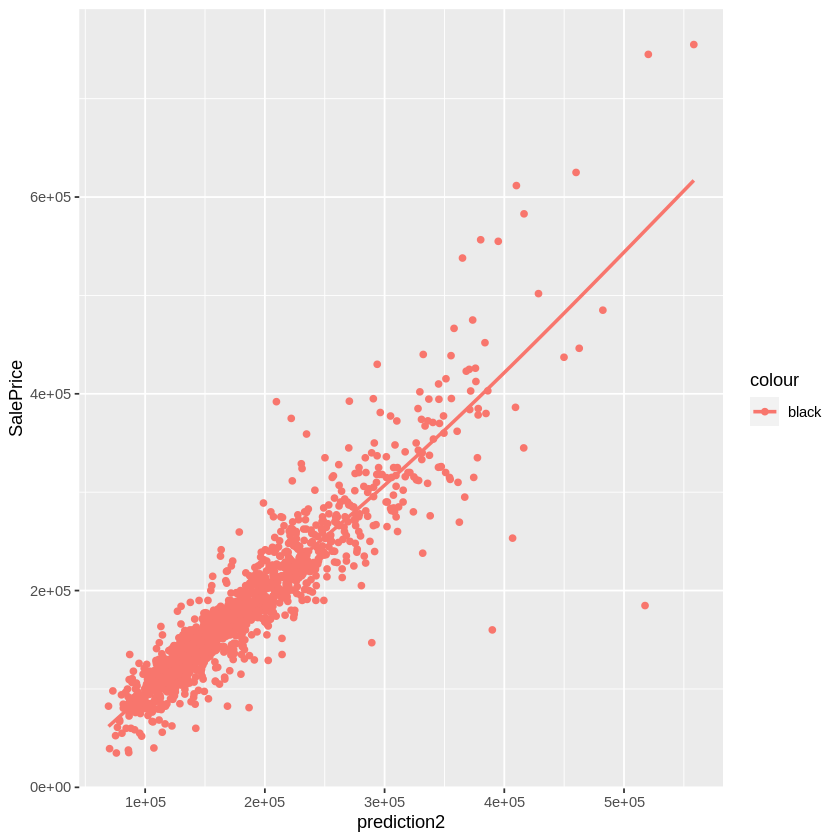

In [465]:
ggplot(data = house_train, mapping = aes(x = prediction2, 
                                 y = SalePrice,
                                 color = "black")) +
  geom_point() +
  geom_smooth(se=FALSE)